In [2]:
import pandas as pd
import numpy as np

import sys
import os
sys.path.append(os.path.abspath('../../automaterialsdata/'))

from bert_util import make_embeddings

In [2]:
OPV_results = pd.read_csv('./scopus_search_results_OPV_with_abstracts.csv')
OPV_results2 = pd.read_csv('./scopus_search_results_photovoltaicANDdonor_with_abstracts.csv')

In [3]:
OPV_results = OPV_results[OPV_results['Abstract'].notnull()].set_index('doi')
OPV_results2 = OPV_results2[OPV_results2['Abstract'].notnull()].set_index('doi')

In [4]:
cleaned_OPV_results = pd.concat([OPV_results, OPV_results2])

In [5]:
cleaned_OPV_results

,Unnamed: 0,publication,publisher,title,year,Abstract
doi,,,,,,
10.1186/s12859-021-04045-3,0,NaN,NaN,In silico comparative study of SARS-CoV-2 prot...,2021,Background Coronavirus Disease 2019 (COVID-19)...
10.1016/j.commatsci.2021.110599,1,NaN,NaN,Algorithmically extracted morphology descripti...,2021,Abstract The device performance of thin film e...
10.1016/j.jlumin.2021.118192,2,NaN,NaN,Cyano-substituted oligo (p-phenylene vinylene)...,2021,Abstract We report on the cyano-OPV (1) posses...
10.1016/j.ijleo.2021.166937,3,NaN,NaN,Effects of the photoactive layer properties an...,2021,Abstract The P3HT:PCBM is an important organic...
10.1016/j.jvacx.2021.100102,4,NaN,NaN,Evaluation and validation of next-generation s...,2021,Highlights • Genetic variants were evaluated t...
...,...,...,...,...,...,...
10.1039/c9se00385a,396,NaN,NaN,Elucidation of photovoltage origin and charge ...,2019,Heterojunctions between p-type cuprous oxide (...
10.1039/c9na00135b,397,NaN,NaN,Carbon nanoonion-ferrocene conjugates as accep...,2019,"Many macromolecular systems, including carbon ..."
10.1039/c9tc00951e,401,NaN,NaN,Tailoring exciton diffusion and domain size in...,2019,Exciton diffusion is an important part of ligh...


In [6]:
for i in range(cleaned_OPV_results.shape[0]):
    if cleaned_OPV_results.iloc[i, 5][:8] == 'Abstract':
        cleaned_OPV_results.iloc[i, 5] = cleaned_OPV_results.iloc[i, 5][9:]

In [7]:
cleaned_OPV_results.head(5)

,Unnamed: 0,publication,publisher,title,year,Abstract
doi,,,,,,
10.1186/s12859-021-04045-3,0,NaN,NaN,In silico comparative study of SARS-CoV-2 prot...,2021,Background Coronavirus Disease 2019 (COVID-19)...
10.1016/j.commatsci.2021.110599,1,NaN,NaN,Algorithmically extracted morphology descripti...,2021,The device performance of thin film electronic...
10.1016/j.jlumin.2021.118192,2,NaN,NaN,Cyano-substituted oligo (p-phenylene vinylene)...,2021,We report on the cyano-OPV (1) possessing a tr...
10.1016/j.ijleo.2021.166937,3,NaN,NaN,Effects of the photoactive layer properties an...,2021,The P3HT:PCBM is an important organic material...
10.1016/j.jvacx.2021.100102,4,NaN,NaN,Evaluation and validation of next-generation s...,2021,Highlights • Genetic variants were evaluated t...


In [8]:
import numpy


In [3]:
import sys
import os
sys.path.append(os.path.abspath('../automaterialsdata/'))

from bert_util import make_embeddings_in_batch,make_embeddings

import torch
import os
import collections
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity
import umap
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from scipy.spatial import distance

import matplotlib.cm as cm
import seaborn as sns

In [4]:
tokenizer = BertTokenizer.from_pretrained("allenai/scibert_scivocab_uncased", do_lower_case=True)   # import the models
model = BertModel.from_pretrained("allenai/scibert_scivocab_uncased")

Some weights of the model checkpoint at allenai/scibert_scivocab_uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [11]:
n_abstract_per_batch = 10

embedding_list = make_embeddings_in_batch(cleaned_OPV_results.iloc[:, 5], n_abstract_per_batch, model, tokenizer)

Embedding abstract 0
Embedding abstract 1
Embedding abstract 2
Embedding abstract 3
Embedding abstract 4
Embedding abstract 5
Embedding abstract 6
Embedding abstract 7
Embedding abstract 8
Embedding abstract 9
Embedding abstract 10
Embedding abstract 11
Embedding abstract 12
Embedding abstract 13
Embedding abstract 14
Embedding abstract 15
Embedding abstract 16
Embedding abstract 17
Embedding abstract 18
Embedding abstract 19
Embedding abstract 20
Embedding abstract 21
Embedding abstract 22
Embedding abstract 23
Embedding abstract 24
Embedding abstract 25
Embedding abstract 26
Embedding abstract 27
Embedding abstract 28
Embedding abstract 29
Embedding abstract 30
Embedding abstract 31
Embedding abstract 32
Embedding abstract 33
Embedding abstract 34
Embedding abstract 35
Embedding abstract 36
Embedding abstract 37
Embedding abstract 38
Embedding abstract 39
Embedding abstract 40
Embedding abstract 41
Embedding abstract 42
Embedding abstract 43
Embedding abstract 44
Embedding abstract 4

Embedding abstract 347
Embedding abstract 348
Embedding abstract 349
Embedding abstract 350
Embedding abstract 351
Embedding abstract 352
Embedding abstract 353
Embedding abstract 354
Embedding abstract 355
Embedding abstract 356
Embedding abstract 357
Embedding abstract 358
Embedding abstract 359
Embedding abstract 360
Embedding abstract 361
Embedding abstract 362
Embedding abstract 363
Embedding abstract 364
Embedding abstract 365
Embedding abstract 366
Embedding abstract 367
Embedding abstract 368
Embedding abstract 369
Embedding abstract 370
Embedding abstract 371
Embedding abstract 372
Embedding abstract 373
Embedding abstract 374
Embedding abstract 375
Embedding abstract 376
Embedding abstract 377
Embedding abstract 378
Embedding abstract 379
Embedding abstract 380
Embedding abstract 381
Embedding abstract 382
Embedding abstract 383
Embedding abstract 384
Embedding abstract 385
Embedding abstract 386
Embedding abstract 387
Embedding abstract 388
Embedding abstract 389
Embedding a

In [25]:
save_df        = pd.DataFrame() 
save_embedding = []

for i in range(len(embedding_list)):
    if embedding_list[i] != 'N/A':
        save_embedding.append(embedding_list[i])
        save_df = pd.concat([save_df, cleaned_OPV_results.iloc[i, :]], axis=1)

save_embedding = np.array(save_embedding)
save_df = save_df.T

In [26]:
print(save_embedding.shape, save_df.shape)

(566, 768) (566, 6)


In [28]:
np.save("ElsevierAPI_SemanticScholar_dataset.npy", save_embedding)
save_df.to_csv("ElsevierAPI_SemanticScholar_dataset.csv")

In [6]:
file_path = "./saeki_and_api_comparison.csv"
data = pd.read_csv(file_path, encoding = "ISO-8859-1")
data.head(5)

,Paper,Abstract,DOI,Source
0,0,Compared to regular conjugat...,10.1016/j.jechem.2020.11.021,API
1,1,Metal halide perovskite nanocrystals (NCs) exh...,10.1016/j.jechem.2020.10.023,API
2,2,"\n In recent years, photocata...",10.1016/j.jmst.2020.10.061,API
3,3,\n Guanidinium (GA) cations a...,10.1016/j.jechem.2020.09.036,API
4,4,\n Tandem solar cells represe...,10.1016/j.jechem.2020.09.022,API


In [7]:
n_abstract_per_batch = 10
abstract_list = data.iloc[:, 1]
embedding_list = make_embeddings_in_batch(abstract_list, n_abstract_per_batch, model, tokenizer)

Embedding abstract 0
Embedding abstract 1
Embedding abstract 2
Embedding abstract 3
Embedding abstract 4
Embedding abstract 5
Embedding abstract 6
Embedding abstract 7
Embedding abstract 8
Embedding abstract 9
Embedding abstract 10
Embedding abstract 11
Embedding abstract 12
Embedding abstract 13
Embedding abstract 14
Embedding abstract 15
Embedding abstract 16
Embedding abstract 17
Embedding abstract 18
Embedding abstract 19
Embedding abstract 20
Embedding abstract 21
Embedding abstract 22
Embedding abstract 23
Embedding abstract 24
Embedding abstract 25
Embedding abstract 26
Embedding abstract 27
Embedding abstract 28
Embedding abstract 29
Embedding abstract 30
Embedding abstract 31
Embedding abstract 32
Embedding abstract 33
Embedding abstract 34
Embedding abstract 35
Embedding abstract 36
Embedding abstract 37
Embedding abstract 38
Embedding abstract 39
Embedding abstract 40
Embedding abstract 41
Embedding abstract 42
Embedding abstract 43
Embedding abstract 44
Embedding abstract 4

In [9]:
save_df        = pd.DataFrame() 
save_embedding = []

for i in range(len(embedding_list)):
    if embedding_list[i] != 'N/A':
        save_embedding.append(embedding_list[i])
        save_df = pd.concat([save_df, data.iloc[i, :]], axis=1)

save_embedding = np.array(save_embedding)
save_df = save_df.T

In [10]:
np.save("old_data.npy", save_embedding)
save_df.to_csv("old_data.csv")

In [11]:
save_df.head(5)

,Paper,Abstract,DOI,Source
0,0,Compared to regular conjugat...,10.1016/j.jechem.2020.11.021,API
1,1,Metal halide perovskite nanocrystals (NCs) exh...,10.1016/j.jechem.2020.10.023,API
2,2,"\n In recent years, photocata...",10.1016/j.jmst.2020.10.061,API
3,3,\n Guanidinium (GA) cations a...,10.1016/j.jechem.2020.09.036,API
4,4,\n Tandem solar cells represe...,10.1016/j.jechem.2020.09.022,API


In [273]:
save_df['Source'].value_counts()

API      92
Saeki    47
Name: Source, dtype: int64

In [107]:
new_df = pd.read_csv("ElsevierAPI_SemanticScholar_dataset.csv")
embedding_new = np.load("ElsevierAPI_SemanticScholar_dataset.npy")

In [109]:
embedding_df = pd.DataFrame(embedding_new)

In [113]:
new_df = pd.concat([new_df, embedding_df], axis=1)
new_df.to_csv("ElsevierAPI_SemanticScholar_dataset.csv")

In [117]:
old_df = pd.concat([save_df, pd.DataFrame(save_embedding)], axis=1)

In [119]:
old_df.to_csv("old_data.csv")

In [120]:
new_df['Source'] = 'API'

In [121]:
new_df = new_df.rename(columns={'Unnamed: 0': "DOI"})

In [122]:
combined_df = pd.concat([old_df, new_df], axis=0)

In [123]:
combined_df

,Paper,Abstract,DOI,Source,0,1,2,3,4,5,...,763,764,765,766,767,Unnamed: 0.1,publication,publisher,title,year
0,0,Compared to regular conjugat...,10.1016/j.jechem.2020.11.021,API,0.227986,-0.388920,-0.351519,0.253678,0.245367,0.026228,...,0.181118,-0.083001,-0.321957,0.325639,-0.760854,NaN,NaN,NaN,NaN,NaN
1,1,Metal halide perovskite nanocrystals (NCs) exh...,10.1016/j.jechem.2020.10.023,API,0.516721,-0.231942,-0.124077,0.327597,-0.031120,-0.244082,...,-0.076686,-0.023025,-0.082176,0.504635,-0.689244,NaN,NaN,NaN,NaN,NaN
2,2,"\n In recent years, photocata...",10.1016/j.jmst.2020.10.061,API,0.115825,-0.481415,-0.037770,0.658707,0.140049,0.047127,...,0.016616,-0.653364,-0.319551,0.405504,-1.257481,NaN,NaN,NaN,NaN,NaN
3,3,\n Guanidinium (GA) cations a...,10.1016/j.jechem.2020.09.036,API,0.341961,-0.432085,-0.437095,0.528036,-0.067532,0.180761,...,0.005949,0.024658,-0.427895,0.385974,-0.819447,NaN,NaN,NaN,NaN,NaN
4,4,\n Tandem solar cells represe...,10.1016/j.jechem.2020.09.022,API,0.143894,-0.568267,-0.159962,0.368089,-0.203750,-0.202491,...,-0.012467,-0.165064,0.018172,0.374654,-0.807790,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
561,NaN,Heterojunctions between p-type cuprous oxide (...,10.1039/c9se00385a,API,0.436974,-0.227419,-0.047845,0.781894,0.121350,0.041837,...,0.025836,-0.092006,-0.425024,0.508739,-0.915348,396.0,NaN,NaN,Elucidation of photovoltage origin and charge ...,2019.0
562,NaN,"Many macromolecular systems, including carbon ...",10.1039/c9na00135b,API,0.307661,-0.341666,0.081599,0.315555,0.222321,-0.078952,...,0.203391,-0.035840,-0.184783,0.570864,-1.004526,397.0,NaN,NaN,Carbon nanoonion-ferrocene conjugates as accep...,2019.0
563,NaN,Exciton diffusion is an important part of ligh...,10.1039/c9tc00951e,API,0.206903,-0.445269,0.092593,0.220890,-0.012963,-0.184871,...,0.001500,-0.094496,-0.098128,0.396124,-0.812894,401.0,NaN,NaN,Tailoring exciton diffusion and domain size in...,2019.0
564,NaN,A novel series of low band gap donor–acceptor ...,10.1021/acs.macromol.9b00682,API,0.195971,-0.557470,-0.172309,0.110446,-0.007515,-0.143346,...,0.499457,0.234745,-0.133982,0.432606,-0.527876,403.0,NaN,NaN,Temperature-Modulated Optimization of High-Per...,2019.0


In [124]:
DOIs = combined_df['DOI'].values

In [125]:
from collections import Counter

In [126]:
DOI_count = Counter(DOIs)

In [127]:
overlap_dois = []

for x, v in DOI_count.items():
    if v > 1:
        overlap_dois.append(x)

overlap_dois

['10.1016/j.jechem.2020.09.025',
 '10.1016/j.jechem.2020.05.060',
 '10.1016/j.orgel.2012.05.001',
 '10.1007/s11664-021-09020-5',
 '10.1021/jacs.0c13352',
 '10.1039/d0qm00581a',
 '10.1016/j.polymer.2020.122900',
 '10.1016/j.solener.2019.06.044',
 '10.1016/j.orgel.2019.02.020']

In [154]:
#drop repeated paper from API

cleaned_df = pd.DataFrame()
repeated_df = pd.DataFrame()

for i in range(combined_df.shape[0]):
    if combined_df.iloc[i, 2] in overlap_dois:
        repeated_df = pd.concat([repeated_df, combined_df.iloc[i, :]], axis=1)
    else:
        cleaned_df = pd.concat([cleaned_df, combined_df.iloc[i, :]], axis=1)
        
        
repeated_df = repeated_df.T

for doi in overlap_dois:
    tmp_df = repeated_df[(repeated_df['DOI'] == doi)]
    if len(set(tmp_df['Source'])) == 1:
        cleaned_df = pd.concat([cleaned_df, tmp_df.iloc[0, :]], axis=1)
    else:
        cleaned_df = pd.concat([cleaned_df, tmp_df.T], axis=1)

cleaned_df = cleaned_df.T

In [162]:
cleaned_df['Source'].value_counts()

API      650
Saeki     46
Name: Source, dtype: int64

In [357]:
cleaned_df.to_csv("SciBert_test.csv")

## Plot data

In [ ]:
cleaned_df = pd.read_csv("SciBert_test.csv")

In [192]:
Saeki_df = cleaned_df[cleaned_df['Source'] == 'Saeki']

Saeki_center = Saeki_df[list(range(768))].mean().to_numpy()

Saeki_distances = []
for i in range(Saeki_df.shape[0]):
    Saeki_distances.append(distance.euclidean(Saeki_center, Saeki_df.iloc[i, :][list(range(768))].to_numpy()))

max_distance = max(Saeki_distances)
avg_distance = sum(Saeki_distances) / len(Saeki_distances)

max_distance, avg_distance

(4.979661420920302, 3.3667302906287686)

In [293]:
max_distance_group = []
avg_distance_group = []

for i in range(cleaned_df.shape[0]):
    d = distance.euclidean(Saeki_center, cleaned_df.iloc[i, :][list(range(768))].to_numpy())
    if (d < max_distance * 0.5):
        max_distance_group.append('< 0.5a')
    else:
        max_distance_group.append('> 0.5a')
    
    if (d < avg_distance * 0.5):
        avg_distance_group.append('< 0.5a')
    else:
        avg_distance_group.append('> 0.5a')


cleaned_df['max_distance'] = max_distance_group
cleaned_df['avg_distance'] = avg_distance_group

In [304]:
cleaned_df['max_distance'].value_counts()

> 0.5a    692
< 0.5a      4
Name: max_distance, dtype: int64

In [303]:
cleaned_df[cleaned_df['max_distance'] == '< 0.5a']

,Paper,Abstract,DOI,Source,0,1,2,3,4,5,...,767,Unnamed: 0.1,publication,publisher,title,year,max_distance_group,avg_distance_group,max_distance,avg_distance
97,97,Three kinds of donoracceptor (DA) type photo...,10.1016/j.cap.2015.02.019,Saeki,0.340146,-0.418721,-0.15036,0.451567,0.123834,-0.040006,...,-0.871885,NaN,NaN,NaN,NaN,NaN,< a/2,a/2 ~ a,< 0.5a,> 0.5a
105,105,Two novel donoracceptor (DA)-type conjugated...,10.1016/j.orgel.2014.09.019,Saeki,0.272736,-0.27728,-0.143149,0.300981,0.138236,-0.096357,...,-0.539558,NaN,NaN,NaN,NaN,NaN,< a/2,a/2 ~ a,< 0.5a,> 0.5a
117,117,Three new alternating copolymers derived from ...,10.1016/j.orgel.2015.12.030,Saeki,0.232163,-0.266645,-0.195362,0.353831,0.035047,-0.062675,...,-0.883662,NaN,NaN,NaN,NaN,NaN,< a/2,a/2 ~ a,< 0.5a,> 0.5a
133,133,A series of low bandgap donoracceptor (DA) c...,10.1016/j.synthmet.2015.11.017,Saeki,0.224162,-0.347112,-0.193732,0.376653,-0.064114,-0.196557,...,-0.591815,NaN,NaN,NaN,NaN,NaN,< a/2,a/2 ~ a,< 0.5a,> 0.5a


In [305]:
Saeki_4paper_center = cleaned_df[cleaned_df['max_distance'] == '< 0.5a'][list(range(768))].mean().to_numpy()

In [326]:
allpaper_distances = []
for i in range(cleaned_df.shape[0]):
    allpaper_distances.append(distance.euclidean(Saeki_4paper_center, cleaned_df.iloc[i, :][list(range(768))].to_numpy()))

half_dmax = max(allpaper_distances) * 0.4
half_dmax

4.74948126986998

In [327]:
distance_group = []

for i in range(cleaned_df.shape[0]):
    d = allpaper_distances[i]
    
    if (d < half_dmax):
        distance_group.append('< 0.4 d_max')
    else:
        distance_group.append('> 0.4 d_max')

cleaned_df['distance'] = distance_group

In [328]:
cleaned_df['distance'].value_counts()

> 0.4 d_max    420
< 0.4 d_max    276
Name: distance, dtype: int64

In [329]:
x = cleaned_df[list(range(768))]
x = StandardScaler().fit_transform(x)

In [334]:
# UMap dimensional reduction
reducer = umap.UMAP()
red_dim = reducer.fit_transform(x)

In [352]:
plot_df = pd.DataFrame(red_dim, columns=['x', 'y'])    # Plotting the dimensional reduction
plot_df = pd.concat([plot_df, cleaned_df[['Source', 'distance']].reset_index(drop=True)], axis=1)

plot_df.columns = ['x', 'y', 'source', 'distance']

plot_df = plot_df.replace('Saeki', 'Benchmark')

plot_df

,x,y,source,distance
0,17.844860,14.572630,API,< 0.4 d_max
1,18.294809,9.037745,API,> 0.4 d_max
2,18.118523,8.370851,API,> 0.4 d_max
3,18.954779,10.486087,API,> 0.4 d_max
4,17.740156,8.644621,API,> 0.4 d_max
...,...,...,...,...
691,15.184968,11.816986,API,> 0.4 d_max
692,17.900558,9.123047,API,> 0.4 d_max
693,18.340092,11.391910,API,< 0.4 d_max
694,16.160194,13.049778,API,< 0.4 d_max


In [360]:
plot_df['distance'].value_counts()

> 0.4 d_max    420
< 0.4 d_max    276
Name: distance, dtype: int64

In [353]:
sns.set(font_scale=2, style='white')

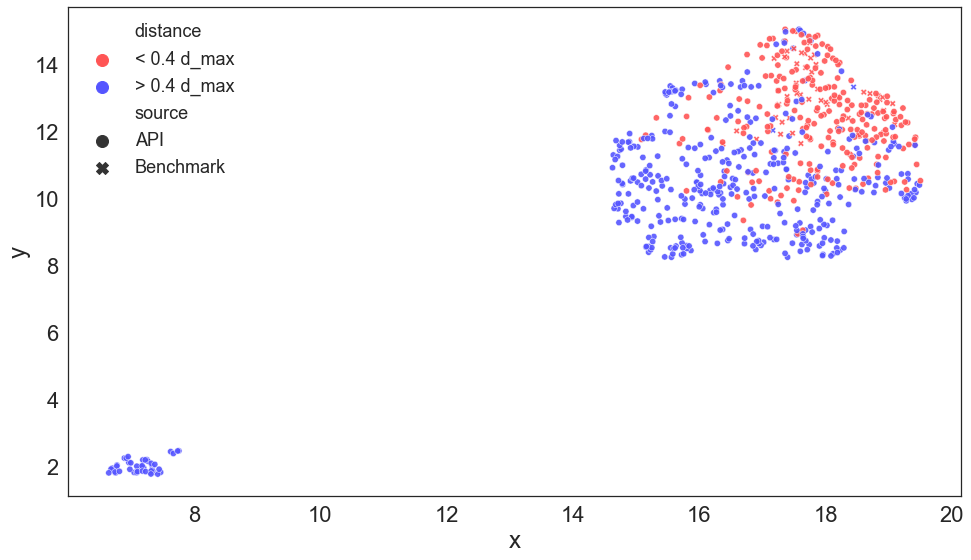

In [362]:
fig, ax = plt.subplots(1, 1, figsize=(16,9))

sns.scatterplot(data=plot_df, x='x', y='y', hue='distance', style='source',
                hue_order=['< 0.4 d_max', '> 0.4 d_max'], 
                palette='seismic_r', s=40,
                markers=['o', 'X'], ax=ax, alpha=0.9)
ax.legend(loc="best", markerscale=2., fontsize=18, frameon=False)

plt.savefig('Scibert_test.pdf', bbox_inches='tight')


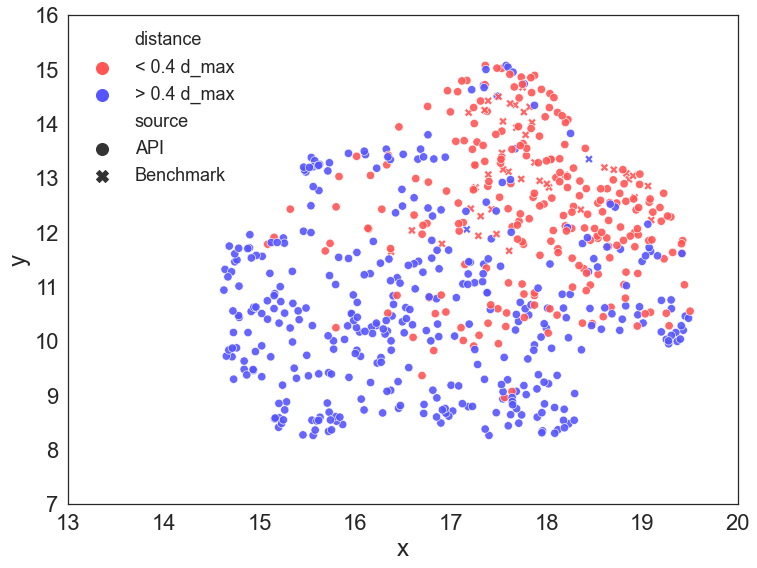

In [361]:
fig, ax = plt.subplots(1, 1, figsize=(12,9))

sns.scatterplot(data=plot_df, x='x', y='y', hue='distance', style='source',
                hue_order=['< 0.4 d_max', '> 0.4 d_max'], 
                palette='seismic_r', s=70,
                markers=['o', 'X'], ax=ax, alpha=0.9)
ax.legend(loc="best", markerscale=2., fontsize=18, frameon=False)

ax.set_ylim([7., 16.0])
ax.set_xlim([13, 20])

plt.savefig('Scibert_test_zoomin.pdf', bbox_inches='tight')